# Traveling Salesman Problem - Optimization Algorithms

This notebook demonstrates the application of optimization algorithms to solve the **Traveling Salesman Problem (TSP)** for Tunisian cities. The algorithms used are:
- **Flower Pollination Algorithm (FPA)**
- **Simulated Annealing (SA)**
- **Genetic Algorithm (GA)**

The notebook replicates the functionality of the Streamlit app, including running the algorithms, visualizing the optimization process, and comparing results.

In [21]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import AntPath
from algorithms import CityData, FlowerPollinationAlgorithm, SimulatedAnnealing, GeneticAlgorithm

# Load City Data
Load the city data for Tunisian cities, including their coordinates and distance matrix.

In [22]:
# Load city data
city_data = CityData()

# Helper Functions
Define helper functions for plotting routes using Matplotlib and Folium.

In [23]:
# Helper function to plot routes using Matplotlib
def plot_route(city_data, route, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    route = list(route) + [route[0]]  # Complete the loop
    ax.scatter(city_data.cities[:, 0], city_data.cities[:, 1], c='red', s=100, zorder=5, label='Cities')
    for i, (x, y) in enumerate(city_data.cities):
        order = route.index(i) + 1 if i in route else None
        ax.text(x, y, f' {city_data.city_names[i]} ({order})', fontsize=8, ha='right', zorder=10)
    ax.plot(city_data.cities[route, 0], city_data.cities[route, 1], 'b-', lw=2, alpha=0.7, label='Route')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Longitude (°E)")
    ax.set_ylabel("Latitude (°N)")
    ax.legend()
    plt.show()
    plt.close(fig)

# Helper function to create a folium map with animated route and arrows
def create_map(city_data, route):
    m = folium.Map(location=[city_data.cities[:, 1].mean(), city_data.cities[:, 0].mean()], zoom_start=7)

    # Add city markers with order numbers
    for i, (lon, lat) in enumerate(city_data.cities):
        order = route.index(i) + 1 if i in route else None
        folium.Marker(
            [lat, lon], 
            popup=f"{city_data.city_names[i]} ({order})" if order else city_data.city_names[i]
        ).add_to(m)

    # Prepare the route coordinates
    route_coords = [[city_data.cities[city, 1], city_data.cities[city, 0]] for city in route]
    route_coords.append(route_coords[0])  # Close the loop by returning to the starting city

    # Add animated route using AntPath
    AntPath(
        locations=route_coords,
        color="blue",
        pulse_color="white",
        weight=6,
        delay=300,  # ~1 second per segment
        dash_array=[60, 20],
    ).add_to(m)

    # Add arrows to indicate direction
    for i in range(len(route_coords) - 1):
        start = route_coords[i]
        end = route_coords[i + 1]
        midpoint = [(start[0] + end[0]) / 2, (start[1] + end[1]) / 2]  # Calculate midpoint

        # Calculate the angle of the arrowhead
        angle = np.arctan2(end[0] - start[0], end[1] - start[1]) * (180 / np.pi)

        folium.PolyLine(
            [start, end],
            color="blue",
            weight=2,
            opacity=0.8
        ).add_to(m)

        # Add an arrowhead marker at the midpoint with the correct rotation
        folium.RegularPolygonMarker(
            location=midpoint,
            fill_color="blue",
            number_of_sides=3,
            radius=10,
            rotation=angle + 90  # Adjust rotation to align with the line
        ).add_to(m)

    return m

# Run Algorithms
Run the Flower Pollination Algorithm (FPA), Simulated Annealing (SA), and Genetic Algorithm (GA) to solve the TSP.

In [24]:
# Solve using Flower Pollination Algorithm
fpa = FlowerPollinationAlgorithm(city_data)
fpa.optimize()

# Solve using Simulated Annealing
sa = SimulatedAnnealing(city_data)
sa.optimize()

# Solve using Genetic Algorithm
ga = GeneticAlgorithm(city_data)
ga.optimize()

# Visualize Results
Visualize the optimization process and final routes for each algorithm.

Flower Pollination Algorithm (FPA):


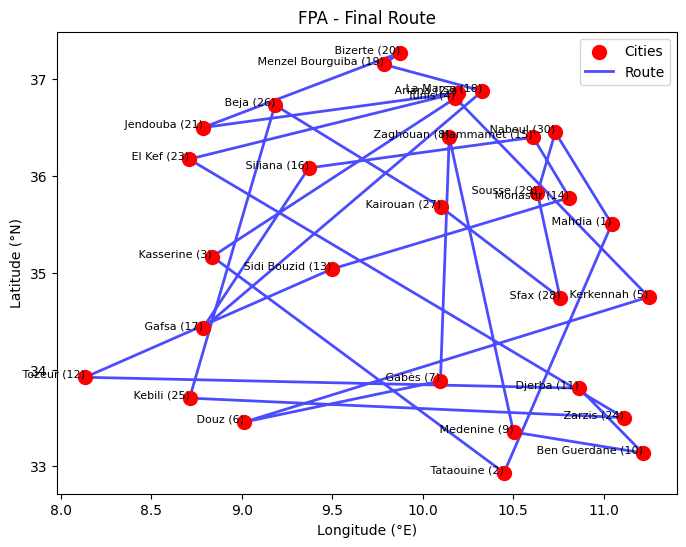

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [25]:
# Visualize FPA results
print("Flower Pollination Algorithm (FPA):")
plot_route(city_data, fpa.best_permutation, "FPA - Final Route")
fpa_map = create_map(city_data, fpa.best_permutation)
fpa_map

Simulated Annealing (SA):


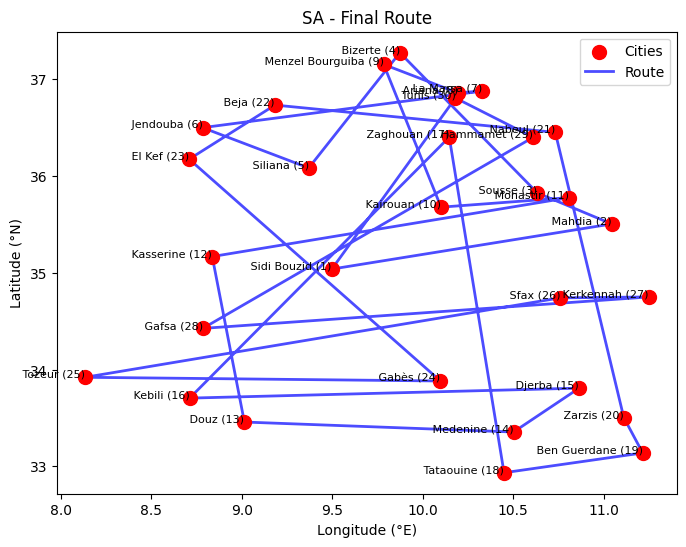

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# Visualize SA results
print("Simulated Annealing (SA):")
plot_route(city_data, sa.best_solution, "SA - Final Route")
sa_map = create_map(city_data, sa.best_solution)
sa_map

Genetic Algorithm (GA):


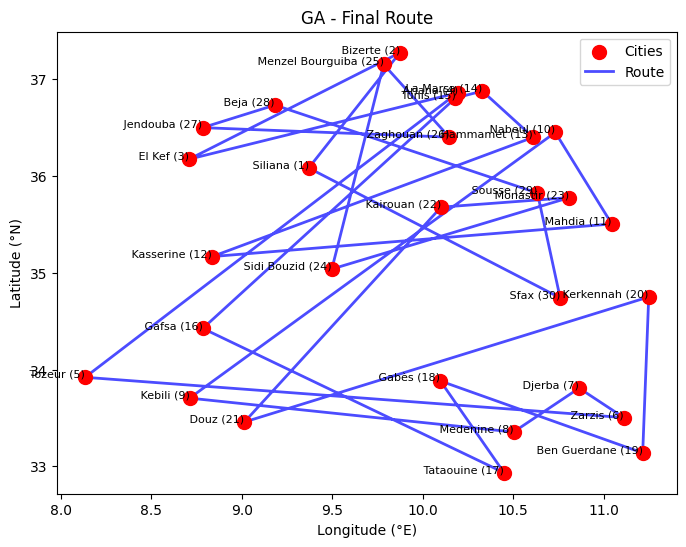

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# Visualize GA results
print("Genetic Algorithm (GA):")
plot_route(city_data, ga.best_solution, "GA - Final Route")
ga_map = create_map(city_data, ga.best_solution)
ga_map

# Compare Results
Compare the performance of the algorithms in terms of best distance and execution time.

In [ ]:
# Compare results
results = {
    "Algorithm": ["FPA", "SA", "GA"],
    "Best Distance (km)": [fpa.best_distance, sa.best_distance, ga.best_distance],
    "Execution Time (s)": [fpa.n_iterations, sa.n_iterations, ga.n_generations]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
results_df.plot(x="Algorithm", y=["Best Distance (km)", "Execution Time (s)"], kind="bar", figsize=(10, 6))
plt.title("Comparison of Algorithms")
plt.ylabel("Value")
plt.show()

AttributeError: 'SimulatedAnnealing' object has no attribute 'n_iterations'

# Animated Race of Algorithms

This section visualizes the performance of the three algorithms (FPA, SA, and GA) in an animated race. The animation shows how the best distance evolves over iterations for each algorithm.

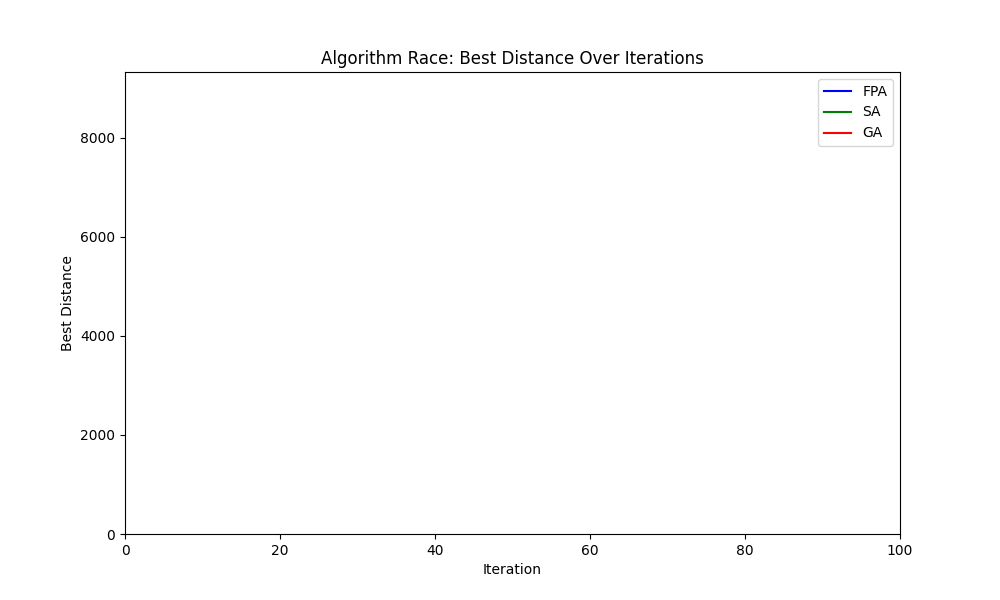

In [27]:
# Import additional libraries for animation
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# Prepare data for animation
fpa_distances = [fpa.total_distance(perm) for perm in fpa.history]
sa_distances = [sa.total_distance(perm) for perm in sa.history]
ga_distances = [ga.total_distance(perm) for perm in ga.history]

max_iterations = max(len(fpa_distances), len(sa_distances), len(ga_distances))

# Pad shorter histories with the last value to match the longest history
fpa_distances += [fpa_distances[-1]] * (max_iterations - len(fpa_distances))
sa_distances += [sa_distances[-1]] * (max_iterations - len(sa_distances))
ga_distances += [ga_distances[-1]] * (max_iterations - len(ga_distances))

# Create the animated plot
fig, ax = plt.subplots(figsize=(10, 6))
lines = {
    "FPA": ax.plot([], [], label="FPA", color="blue")[0],
    "SA": ax.plot([], [], label="SA", color="green")[0],
    "GA": ax.plot([], [], label="GA", color="red")[0],
}
ax.set_xlim(0, max_iterations)
ax.set_ylim(0, max(max(fpa_distances), max(sa_distances), max(ga_distances)) * 1.1)
ax.set_title("Algorithm Race: Best Distance Over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Best Distance")
ax.legend()

def update(frame):
    x = list(range(frame + 1))
    lines["FPA"].set_data(x, fpa_distances[:frame + 1])
    lines["SA"].set_data(x, sa_distances[:frame + 1])
    lines["GA"].set_data(x, ga_distances[:frame + 1])
    return lines.values()

ani = FuncAnimation(fig, update, frames=max_iterations, blit=True, repeat=False)

# Save the animation as a GIF
gif_path = "algorithm_race.gif"
ani.save(gif_path, writer="pillow", fps=10)

plt.close(fig)

# Display the GIF in the notebook
display(Image(filename=gif_path))

# Explanation

- **FPA, SA, GA**: Each algorithm's best distance is plotted over iterations.
- **Animation**: The race shows how each algorithm progresses toward the optimal solution.
- **Output**: The animation is saved as `algorithm_race.gif` and displayed inline in the notebook.

# Sensitivity Analysis

This section explores how changes in algorithm parameters affect their performance. The sensitivity analysis is performed for:
- **Flower Pollination Algorithm (FPA)**
- **Simulated Annealing (SA)**
- **Genetic Algorithm (GA)**

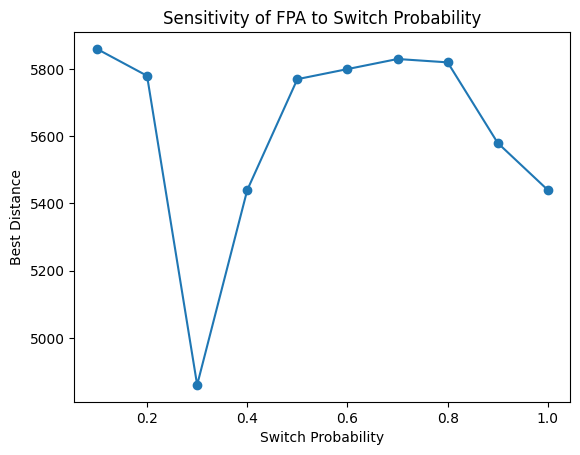

In [28]:
# Sensitivity Analysis for FPA
switch_probs = np.linspace(0.1, 1.0, 10)
gamma_values = np.linspace(0.01, 1.0, 10)
lambda_values = np.linspace(0.1, 2.0, 10)

results = []
for switch_prob in switch_probs:
    fpa = FlowerPollinationAlgorithm(city_data, switch_prob=switch_prob, gamma=0.1, lambda_=1.5)
    fpa.optimize()
    results.append({"Switch Prob": switch_prob, "Best Distance": fpa.best_distance})

# Plot sensitivity to switch probability
switch_prob_results = [r["Best Distance"] for r in results]
plt.plot(switch_probs, switch_prob_results, marker="o")
plt.title("Sensitivity of FPA to Switch Probability")
plt.xlabel("Switch Probability")
plt.ylabel("Best Distance")
plt.show()

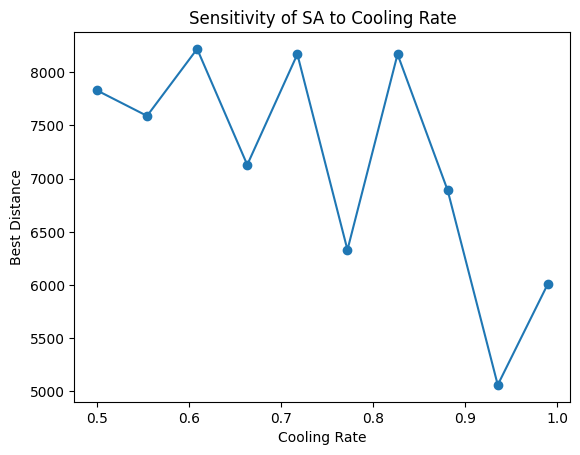

In [29]:
# Sensitivity Analysis for SA
cooling_rates = np.linspace(0.5, 0.99, 10)
results = []
for cooling_rate in cooling_rates:
    sa = SimulatedAnnealing(city_data, initial_temp=1000, cooling_rate=cooling_rate)
    sa.optimize()
    results.append({"Cooling Rate": cooling_rate, "Best Distance": sa.best_distance})

# Plot sensitivity to cooling rate
cooling_rate_results = [r["Best Distance"] for r in results]
plt.plot(cooling_rates, cooling_rate_results, marker="o")
plt.title("Sensitivity of SA to Cooling Rate")
plt.xlabel("Cooling Rate")
plt.ylabel("Best Distance")
plt.show()

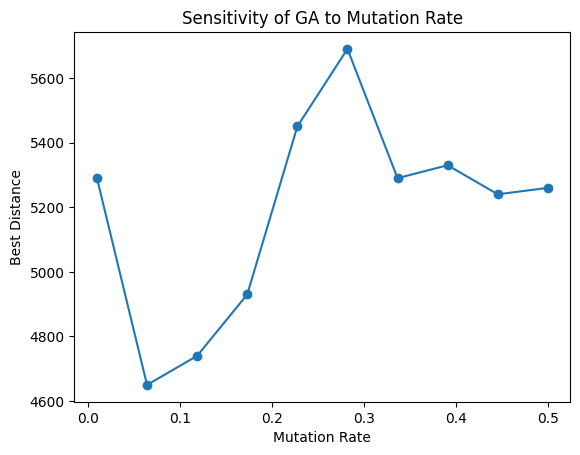

In [30]:
# Sensitivity Analysis for GA
mutation_rates = np.linspace(0.01, 0.5, 10)
results = []
for mutation_rate in mutation_rates:
    ga = GeneticAlgorithm(city_data, population_size=50, mutation_rate=mutation_rate)
    ga.optimize()
    results.append({"Mutation Rate": mutation_rate, "Best Distance": ga.best_distance})

# Plot sensitivity to mutation rate
mutation_rate_results = [r["Best Distance"] for r in results]
plt.plot(mutation_rates, mutation_rate_results, marker="o")
plt.title("Sensitivity of GA to Mutation Rate")
plt.xlabel("Mutation Rate")
plt.ylabel("Best Distance")
plt.show()